<a href="https://colab.research.google.com/github/Xoith000/test/blob/main/cal_house_prize_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np

In [21]:
df = pd.read_csv('housing.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [23]:
df.total_bedrooms.isnull().value_counts()

,count
total_bedrooms,
False,20433
True,207


In [24]:
df.dropna(inplace = True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [26]:
x = df.drop(['median_house_value'],axis = 1)
y = df.median_house_value

In [27]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 )


In [29]:
x.shape

(20433, 9)

In [30]:
train_data = x_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

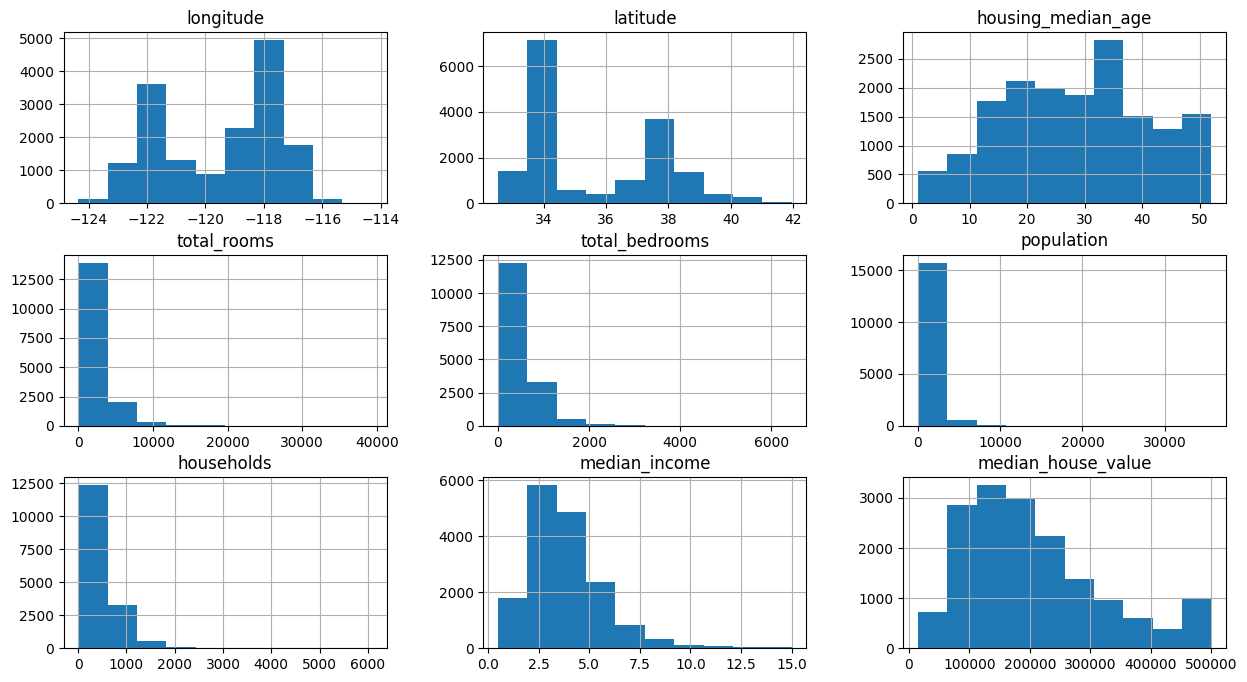

In [31]:
train_data.hist(figsize=(15,8))

In [32]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households']  )

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

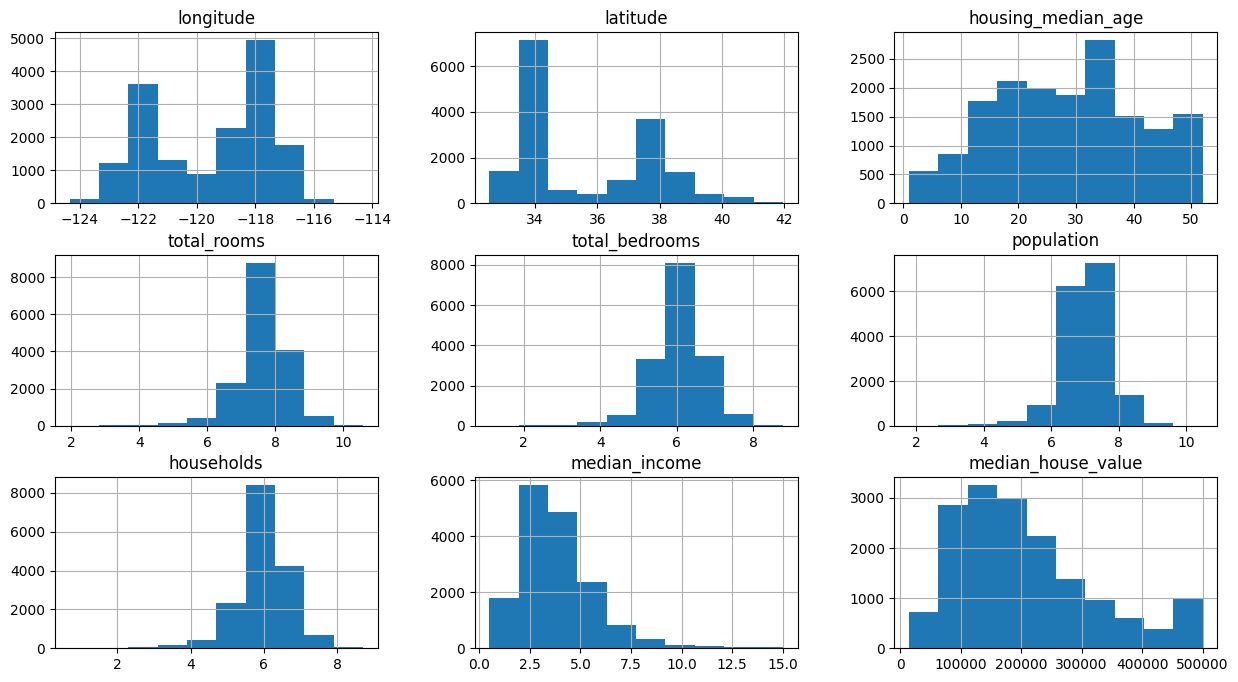

In [33]:
train_data.hist(figsize=(15,8))

In [34]:

# Check for NaN or infinite values in the columns
print(train_data[['total_rooms', 'total_bedrooms', 'population', 'households']].isna().sum())
print((train_data[['total_rooms', 'total_bedrooms', 'population', 'households']] == np.inf).sum())


total_rooms       0
total_bedrooms    0
population        0
households        0
dtype: int64
total_rooms       0
total_bedrooms    0
population        0
households        0
dtype: int64


In [35]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+ 1 )
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population']+ 1 )
train_data['households'] = np.log(train_data['households'] + 1)


In [36]:
import matplotlib.pyplot as plt


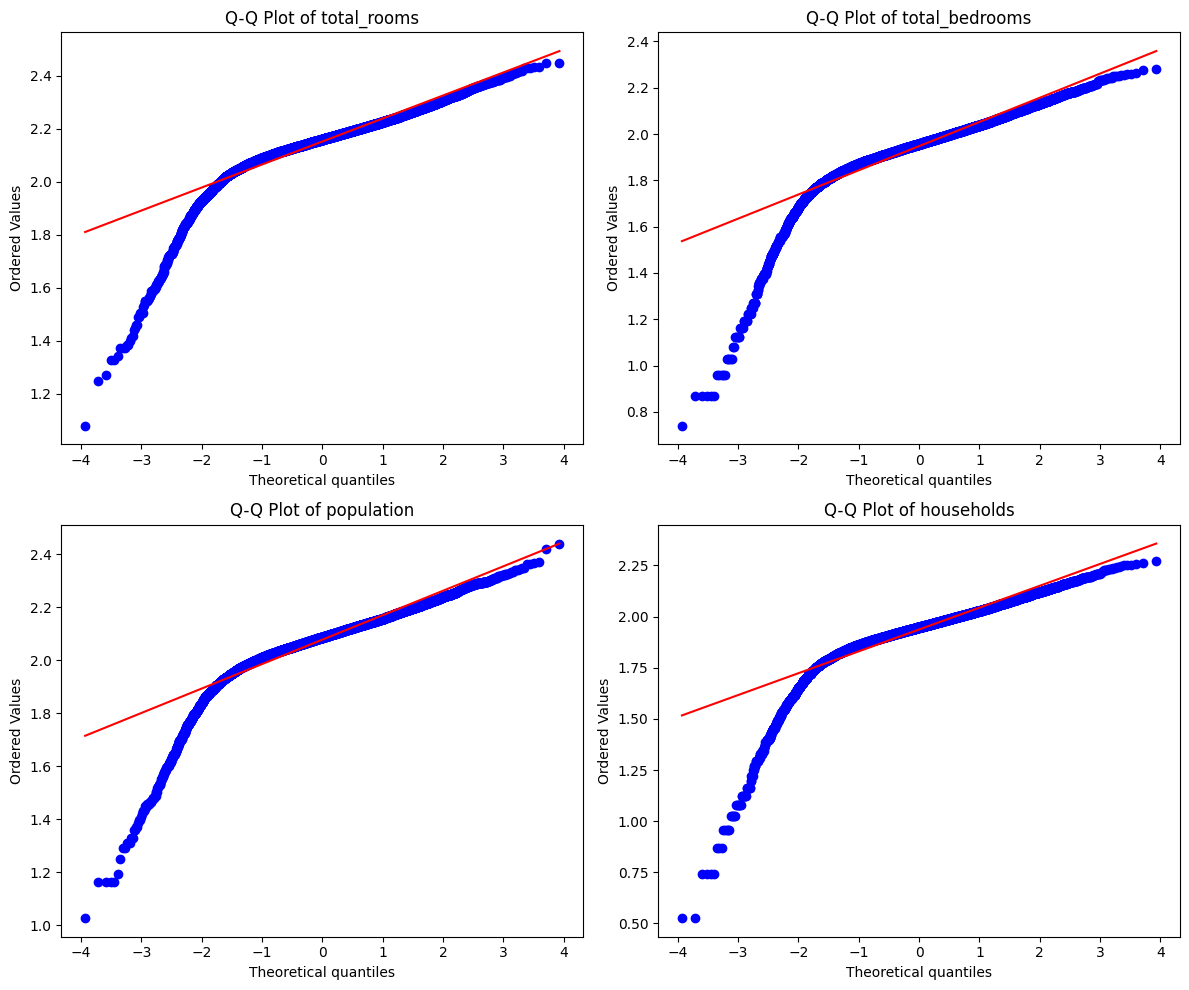

In [37]:
import scipy.stats as stats

# Q-Q plot for transformed columns
plt.figure(figsize=(12, 10))
for i, column in enumerate(['total_rooms', 'total_bedrooms', 'population', 'households'], 1):
    plt.subplot(2, 2, i)
    stats.probplot(train_data[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
plt.tight_layout()
plt.show()

In [38]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
15636,-122.41,37.80,52.0,2.220892,2.045241,2.113511,2.023753,5.8660,NEAR BAY,500001.0
9504,-123.36,39.01,35.0,2.121938,1.913173,2.048287,1.896564,2.7232,<1H OCEAN,115400.0
17537,-121.89,37.35,47.0,2.193389,2.008065,2.164444,2.002409,3.2599,<1H OCEAN,183100.0
16863,-122.41,37.63,35.0,2.049483,1.860189,2.001739,1.853152,3.0000,NEAR OCEAN,229100.0
445,-122.29,37.87,50.0,2.141485,1.985954,2.083181,1.980464,2.6684,NEAR BAY,185600.0
...,...,...,...,...,...,...,...,...,...,...
11952,-117.44,33.93,33.0,2.107060,1.866876,2.024679,1.860189,4.3750,INLAND,129900.0
773,-122.11,37.66,36.0,2.136624,1.910860,2.056407,1.902174,4.1302,NEAR BAY,172700.0
1339,-121.89,38.01,28.0,2.219175,2.031135,2.171073,2.009961,3.0042,INLAND,103900.0
1068,-121.85,39.73,17.0,2.212567,2.043687,2.176111,2.032177,0.9393,INLAND,88900.0


In [39]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'],dtype = int)).drop(['ocean_proximity'],axis = 1 )

In [40]:
#train_data.ocean_proximity.value_counts()

In [41]:
# Drop rows with NaN or infinite values
train_data = train_data[train_data[['total_rooms', 'total_bedrooms', 'population', 'households']].notna().all(axis=1)]


<Axes: >

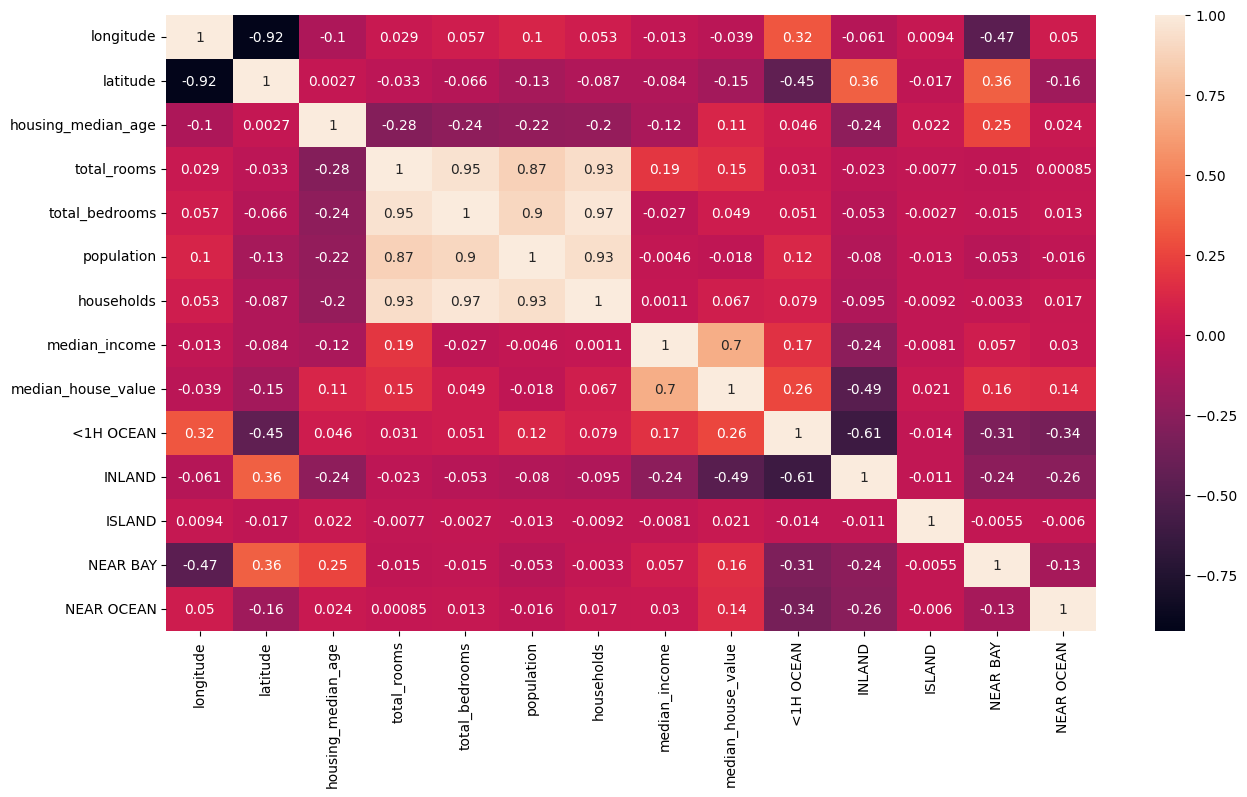

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8 ))
sns.heatmap(train_data.corr(numeric_only = True),annot = True )

<Axes: >

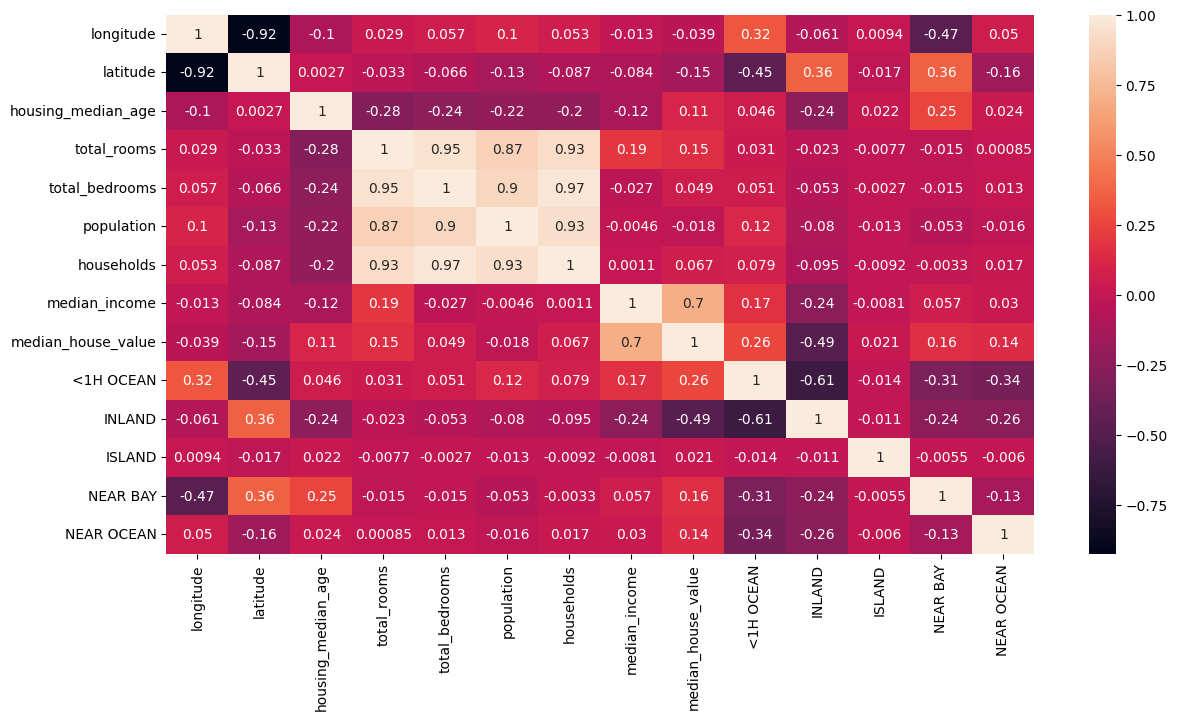

In [43]:
plt.figure(figsize=(14,7))
sns.heatmap(train_data.corr(numeric_only=True),annot = True)

<Axes: xlabel='latitude', ylabel='longitude'>

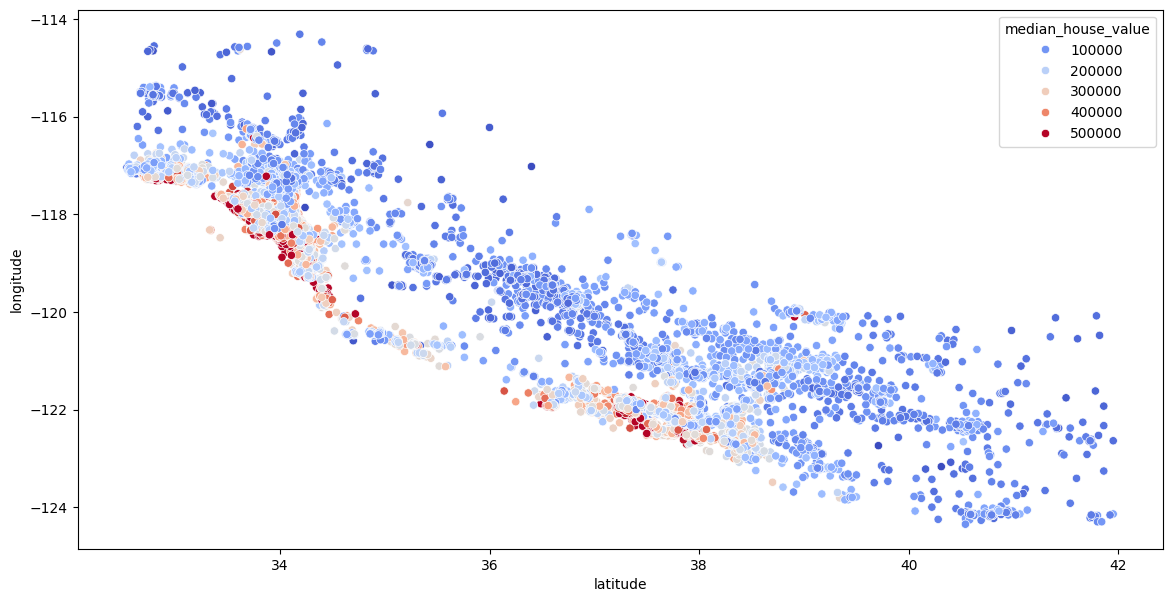

In [44]:
plt.figure(figsize=(14,7))
sns.scatterplot(x = 'latitude',y='longitude',data = train_data, hue = 'median_house_value',palette='coolwarm' )

In [45]:
train_data['bedroom_room_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']

In [46]:
train_data['households_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

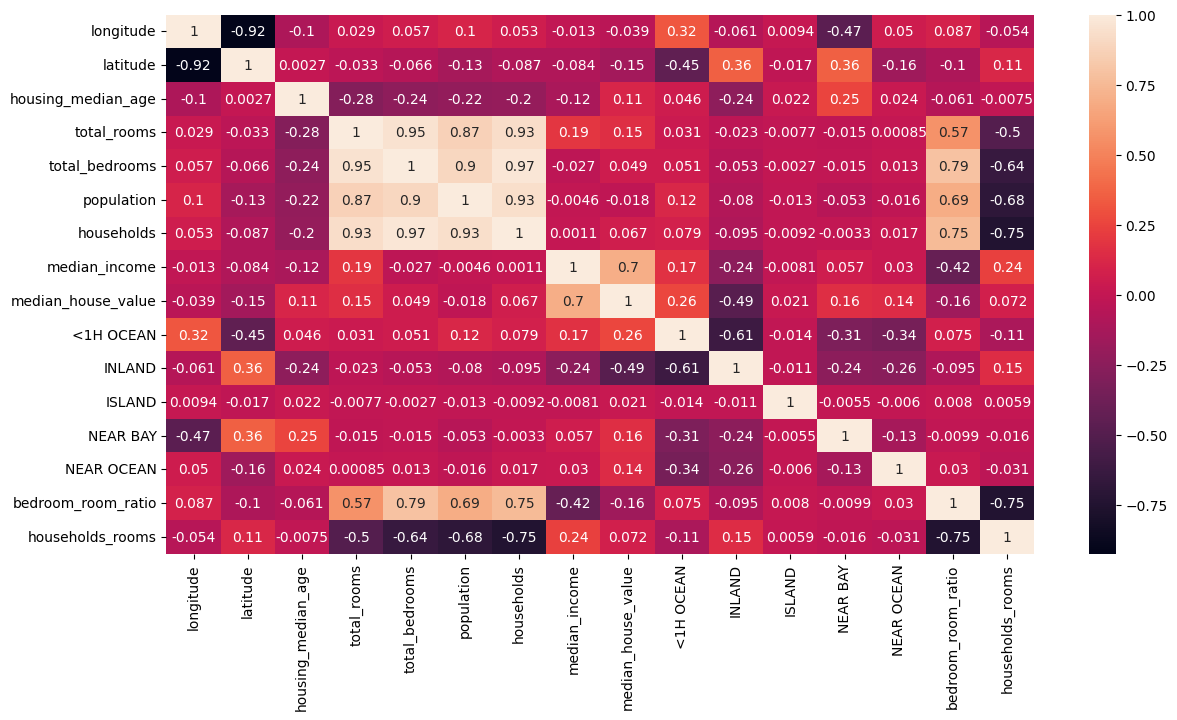

In [47]:
plt.figure(figsize=(14,7))
sns.heatmap(train_data.corr(numeric_only=True),annot = True)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x,y = return

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_room_ratio,households_rooms
15636,-122.41,37.80,52.0,2.220892,2.045241,2.113511,2.023753,5.8660,500001.0,0,0,0,1,0,0.920910,1.097412
9504,-123.36,39.01,35.0,2.121938,1.913173,2.048287,1.896564,2.7232,115400.0,1,0,0,0,0,0.901616,1.118833
17537,-121.89,37.35,47.0,2.193389,2.008065,2.164444,2.002409,3.2599,183100.0,1,0,0,0,0,0.915508,1.095375
16863,-122.41,37.63,35.0,2.049483,1.860189,2.001739,1.853152,3.0000,229100.0,0,0,0,0,1,0.907638,1.105944
445,-122.29,37.87,50.0,2.141485,1.985954,2.083181,1.980464,2.6684,185600.0,0,0,0,1,0,0.927372,1.081305


In [61]:
x = train_data.drop(['median_house_value'],axis = 1)
y = train_data['median_house_value']

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2)

In [54]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [63]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_room_ratio,households_rooms
20491,-118.67,34.27,15.0,2.205827,2.013868,2.108731,2.002632,3.5313,1,0,0,0,0,0.912976,1.101464
3658,-118.41,34.21,35.0,2.163721,1.964483,2.125207,1.960140,4.0167,1,0,0,0,0,0.907919,1.103860
11667,-118.01,33.85,29.0,2.200201,2.003959,2.172701,2.009752,4.6326,1,0,0,0,0,0.910807,1.094762
8179,-118.11,33.80,35.0,2.072185,1.824307,1.959824,1.820695,5.4602,1,0,0,0,0,0.880378,1.138128
12581,-121.42,38.52,32.0,2.191394,1.990961,2.129678,1.971877,2.5574,0,1,0,0,0,0.908536,1.111324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13763,-117.12,34.06,38.0,1.893399,1.614495,1.795732,1.599639,1.3906,0,1,0,0,0,0.852697,1.183642
5337,-118.46,34.04,31.0,2.182866,2.023194,2.128014,2.016468,3.2870,1,0,0,0,0,0.926852,1.082519
8754,-118.36,33.82,28.0,1.652403,1.327761,1.591686,1.223156,6.1359,1,0,0,0,0,0.803534,1.350934
17257,-119.70,34.41,52.0,2.119991,1.964178,2.128087,1.961083,2.2069,0,0,0,0,1,0.926503,1.081030


In [64]:
reg.fit(x_train,y_train)

LinearRegression()

In [68]:
predicted = reg.predict(x_test)

In [69]:
from sklearn.metrics import r2_score
r2_score(y_test,predicted)

0.6771223714327911

In [70]:
reg.score(x_test,y_test)

0.6771223714327911